In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("/Users/nipunbatra/Downloads/recs2009_public.csv")

In [4]:
df.columns

Index([u'DOEID', u'REGIONC', u'DIVISION', u'REPORTABLE_DOMAIN', u'TYPEHUQ',
       u'NWEIGHT', u'HDD65', u'CDD65', u'HDD30YR', u'CDD30YR',
       ...
       u'SCALEEL', u'KAVALNG', u'PERIODNG', u'SCALENG', u'PERIODLP',
       u'SCALELP', u'PERIODFO', u'SCALEFO', u'PERIODKR', u'SCALEKER'],
      dtype='object', length=931)

In [5]:
df.head()

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALEEL,KAVALNG,PERIODNG,SCALENG,PERIODLP,SCALELP,PERIODFO,SCALEFO,PERIODKR,SCALEKER
0,1,2,4,12,2,2471.679705,4742,1080,4953,1271,...,0,-2,-2,-2,-2,-2,-2,-2,-2,-2
1,2,4,10,26,2,8599.172010,2662,199,2688,143,...,0,1,1,0,-2,-2,-2,-2,-2,-2
2,3,1,1,1,5,8969.915921,6233,505,5741,829,...,0,3,5,3,-2,-2,-2,-2,-2,-2
3,4,2,3,7,2,18003.639600,6034,672,5781,868,...,3,3,5,3,-2,-2,-2,-2,-2,-2
4,5,1,1,1,3,5999.605242,5388,702,5313,797,...,0,1,1,0,-2,-2,-2,-2,-2,-2


In [6]:
%matplotlib inline

In [7]:
state_mapping = {'Virginia':13, 'Texas':21,'California':26,'Colorado':22}
appliance_map = {'Total':'KWH','Fridge':'KWHRFG','HEATING':'KWHSPH','COOLING':'KWHCOL','OTHERS':'KWHOTH'}


In [8]:
out = {}
out_cooling ={}
out_heating = {}
for state_name, state_code in state_mapping.iteritems():
    temp = {}
    t = {}
    state_data = df[df['REPORTABLE_DOMAIN']==state_code]
    for appliance, appliance_key in appliance_map.iteritems():
        temp[appliance] = state_data.NWEIGHT*state_data[appliance_key]
        t[appliance] = state_data[appliance_key]
    
    out[state_name] = (pd.DataFrame(temp).sum()/pd.DataFrame(temp).sum()['Total']).head(4)
    out_cooling[state_name] = pd.DataFrame(t)['COOLING'].mean()/8
    out_heating[state_name] = pd.DataFrame(t)['HEATING'].mean()/4
    

In [9]:
pd.DataFrame(out)

,California,Colorado,Texas,Virginia
COOLING,0.105420,0.032616,0.287332,0.149039
Fridge,0.154330,0.151779,0.092031,0.095993
HEATING,0.058208,0.062384,0.075822,0.145869
OTHERS,0.651634,0.704645,0.459546,0.494846


In [35]:
out_cooling

{'California': 94.9625991594023,
 'Texas': 511.21311970232097,
 'Virginia': 279.21915035587205}

In [36]:
out_heating

{'California': 102.04692714819421,
 'Texas': 275.8241516145309,
 'Virginia': 538.8713540925269}

In [21]:
pd.DataFrame(out).sum()/pd.DataFrame(out).sum()['Total']

COOLING    0.149039
Fridge     0.095993
HEATING    0.145869
OTHERS     0.494846
Total      1.000000
dtype: float64

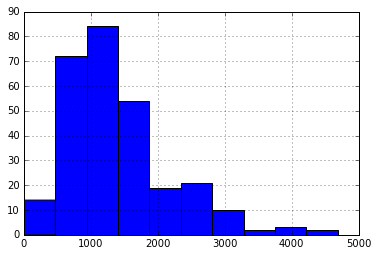

In [14]:
df[df.REPORTABLE_DOMAIN==13]['KWHRFG'].hist()

In [1]:
df

NameError: name 'df' is not defined

In [5]:
df

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALEEL,KAVALNG,PERIODNG,SCALENG,PERIODLP,SCALELP,PERIODFO,SCALEFO,PERIODKR,SCALEKER
0,1,2,4,12,2,2471.679705,4742,1080,4953,1271,...,0,-2,-2,-2,-2,-2,-2,-2,-2,-2
1,2,4,10,26,2,8599.172010,2662,199,2688,143,...,0,1,1,0,-2,-2,-2,-2,-2,-2
2,3,1,1,1,5,8969.915921,6233,505,5741,829,...,0,3,5,3,-2,-2,-2,-2,-2,-2
3,4,2,3,7,2,18003.639600,6034,672,5781,868,...,3,3,5,3,-2,-2,-2,-2,-2,-2
4,5,1,1,1,3,5999.605242,5388,702,5313,797,...,0,1,1,0,-2,-2,-2,-2,-2,-2
5,6,2,4,10,2,4232.486778,8866,270,8708,436,...,0,1,1,0,-2,-2,-2,-2,-2,-2
6,7,1,2,3,2,7862.341967,5213,749,5355,796,...,0,1,1,0,-2,-2,-2,-2,-2,-2
7,8,3,5,17,2,6297.038285,1086,2647,1070,2554,...,0,-2,-2,-2,-2,-2,-2,-2,-2,-2
8,9,1,2,5,3,12156.721510,4826,1027,5381,912,...,0,1,1,0,-2,-2,-2,-2,-2,-2
9,10,2,4,12,2,3242.224473,4687,1205,4755,1467,...,0,1,1,0,-2,-2,-2,-2,-2,-2


In [6]:
md_df = pd.read_csv('../data/input/audits_2013_main.csv')

In [8]:
md_df.columns

Index([u'dataid', u'Id', u'Auditor__c', u'Date_of_Audit__c', u'Notes__c',
       u'Number_of_Floors__c', u'Number_of_Bedrooms__c',
       u'Construction_Year__c', u'Builder__c',
       u'Conditioned_Square_Footage__c', u'House_Volume_Cubic_Footage__c',
       u'Front_Door_Orientation__c', u'HVAC_Service_Company__c',
       u'Utilities__c', u'Foundation_Type__c', u'Type_of_Home__c',
       u'Number_of_Central_Heat_Pumps__c', u'Number_of_Central_AC_Systems__c',
       u'Number_of_AC_Window_Units__c', u'Number_of_Other_Cooling_Systems__c',
       u'Type_of_Other_Cooling_Systems__c',
       u'Number_of_Central_Gas_Heating_Systems__c',
       u'Number_of_Wall_Furnaces__c', u'Number_of_Gas_Space_Heaters__c',
       u'Number_of_Heat_Recovery_Systems__c',
       u'Number_of_Electric_Space_Heaters__c',
       u'Number_of_Hydronic_Space_Heaters__c',
       u'Description_Dedicated_Ventilation_Syst__c',
       u'Number_of_Manual_Thermostats__c', u'Number_of_Digital_Thermostats__c',
       u'Attic_

In [11]:
md_df['Number_of_Electric_Space_Heaters__c'].describe()

count    62.000000
mean      0.064516
std       0.306806
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       2.000000
Name: Number_of_Electric_Space_Heaters__c, dtype: float64